In [1]:
import sparql_dataframe
import matplotlib.pyplot as plt
import pandas as pd

endpoint_url = "https://orkg.org/triplestore"

PREFIX = """
        PREFIX orkgr: <http://orkg.org/orkg/resource/>
        PREFIX orkgc: <http://orkg.org/orkg/class/>
        PREFIX orkgp: <http://orkg.org/orkg/predicate/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        """

query = """
        SELECT ?contribution, ?title, ?data_analysis, ?machine_learning
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?contribution rdfs:label ?contribution_name.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P15124 ?data_analysis.
                  OPTIONAL{?data_analysis orkgp:P57016 ?machine_learning.}}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data.head()

,contribution,title,data_analysis,machine_learning
0,http://orkg.org/orkg/resource/R195470,Mining Twitter Feeds for Software User Require...,http://orkg.org/orkg/resource/R195478,http://orkg.org/orkg/resource/R195479
1,http://orkg.org/orkg/resource/R195137,App Review Analysis Via Active Learning: Reduc...,http://orkg.org/orkg/resource/R195141,http://orkg.org/orkg/resource/R195142
2,http://orkg.org/orkg/resource/R199165,"Bug report, feature request, or simply praise?...",http://orkg.org/orkg/resource/R199171,http://orkg.org/orkg/resource/R199172
3,http://orkg.org/orkg/resource/R198935,Software Feature Request Detection in Issue Tr...,http://orkg.org/orkg/resource/R198939,http://orkg.org/orkg/resource/R198940
4,http://orkg.org/orkg/resource/R194319,Optimizing for Recall in Automatic Requirement...,http://orkg.org/orkg/resource/R194326,http://orkg.org/orkg/resource/R194327


Data collection methods

<AxesSubplot:ylabel='collection method'>

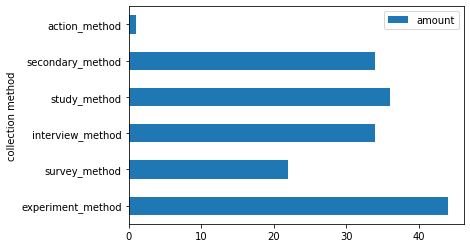

In [2]:
query = """
        SELECT ?experiment_method, ?survey_method, ?interview_method, ?study_method, ?secondary_method, ?action_method
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007 ?experiment.
              ?experiment rdfs:label ?experiment_method.}
              OPTIONAL{?data_collection_method orkgp:P57036 ?survey.
              ?survey rdfs:label ?survey_method.}
              OPTIONAL{?data_collection_method orkgp:P57034 ?interview.
              ?interview rdfs:label ?interview_method.}
              OPTIONAL{?data_collection_method orkgp:P57040 ?study.
              ?study rdfs:label ?study_method.}
              OPTIONAL{?data_collection_method orkgp:P57021 ?secondary_research.
              ?secondary_research rdfs:label ?secondary_method.}
              OPTIONAL{?data_collection_method orkgp:P57020 ?action_research.
              ?action_research rdfs:label ?action_method.}
              
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
cm = []
values = []
for i in data:
        cm.append(i)
        values.append(data[i].value_counts().sum())
test = pd.DataFrame(data={'collection method': cm, 'amount':values})
test.plot(kind='barh', x='collection method', y='amount')

<AxesSubplot:ylabel='collection method'>

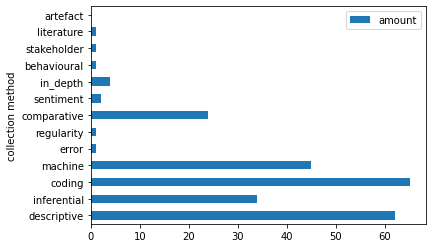

In [3]:
query = """
        SELECT ?descriptive, ?inferential, ?coding, ?machine, ?error, ?regularity, ?comparative, 
                ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE {
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?contribution orkgp:P15124 ?analysis.
                OPTIONAL{?analysis orkgp:P56048/rdfs:label ?descriptive.}
                OPTIONAL{?analysis orkgp:P56043/rdfs:label ?inferential.}
                OPTIONAL{?analysis orkgp:P59061/rdfs:label ?coding.}
                OPTIONAL{?analysis orkgp:P57016/rdfs:label ?machine.}
                OPTIONAL{?analysis orkgp:P15099/rdfs:label ?error}
                OPTIONAL{?analysis orkgp:P59057/rdfs:label ?regularity.}
                OPTIONAL{?analysis orkgp:P59058/rdfs:label ?comparative.}
                OPTIONAL{?analysis orkgp:P59059/rdfs:label ?triangulation.}
                OPTIONAL{?analysis orkgp:P59074/rdfs:label ?sentiment.}
                OPTIONAL{?analysis orkgp:P59094/rdfs:label ?in_depth.}
                OPTIONAL{?analysis orkgp:P59095/rdfs:label ?behavioural.}
                OPTIONAL{?analysis orkgp:P59110/rdfs:label ?stakeholder.}
                OPTIONAL{?analysis orkgp:P59126/rdfs:label ?literature.}
                OPTIONAL{?analysis orkgp:60007/rdfs:label ?artefact.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
cm = []
values = []
for i in data:
        cm.append(i)
        values.append(data[i].value_counts().sum())
test = pd.DataFrame(data={'collection method': cm, 'amount':values})
test.plot(kind='barh', x='collection method', y='amount')

RQ

<AxesSubplot:>

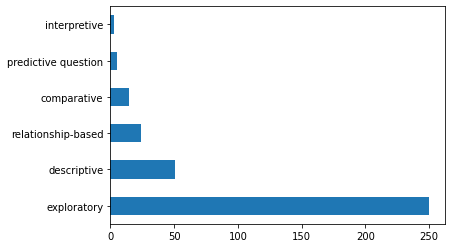

In [4]:
#predictive question zu predictive
query = """
        SELECT ?contribution, ?typ
        WHERE {
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?contribution orkgp:P37330 ?RQ.
                ?RQ orkgp:P41928 ?type.
                ?type rdfs:label ?typ.
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['typ'].value_counts().plot(kind='barh')

<AxesSubplot:title={'center':'Analysis method in combination with experiment'}, ylabel='usage'>

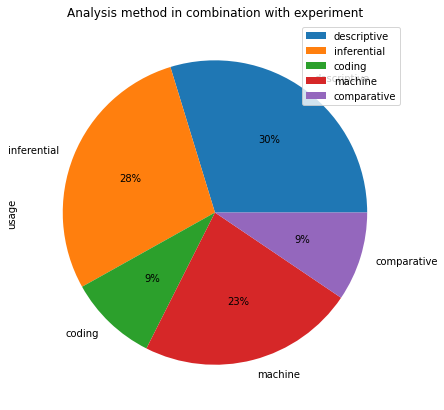

In [5]:
query = """
        SELECT ?descriptive, ?inferential, ?grounded, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?category, ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P1007 ?experiment.
                ?experiment rdfs:label ?exp.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048/rdfs:label ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043/rdfs:label ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P57015/rdfs:label ?grounded.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59061/rdfs:label ?coding.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P57016/rdfs:label ?machine.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P15099/rdfs:label ?error}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59057/rdfs:label ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59058/rdfs:label ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59059/rdfs:label ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59060/rdfs:label ?category.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59074/rdfs:label ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59094/rdfs:label ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59095/rdfs:label ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59110/rdfs:label ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59126/rdfs:label ?literature.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:60007/rdfs:label ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
types = []
amount = []
for i in data:
        if data[i].value_counts().sum() != 0:
                types.append(i)
                amount.append(data[i].value_counts().sum())

test = pd.DataFrame({'usage': amount}, index=types)
test.plot(kind='pie', y='usage', autopct='%1.0f%%', figsize=(7,7), title="Analysis method in combination with experiment")

<AxesSubplot:title={'center':'Interview methods'}>

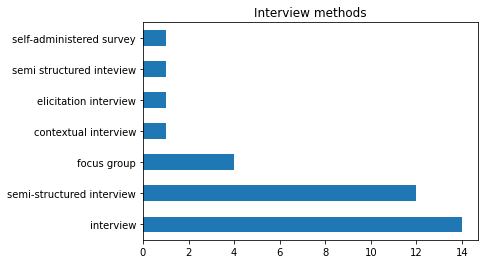

In [6]:
query = """
        SELECT ?contribution, ?interview
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P56008/orkgp:P57034/rdfs:label ?interview.
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['interview'].value_counts().plot(kind='barh', title="Interview methods")

In [7]:
query = """
        SELECT ?year, ?experiment, ?study, ?survey, ?secondary_research, ?action_research, ?interview
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?paper orkgp:P29 ?year.
                OPTIONAL{?contribution orkgp:P56008/orkgp:P1007/rdfs:label ?experiment.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57040/rdfs:label ?study.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57036/rdfs:label ?survey.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57021/rdfs:label ?secondary_research.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57020/rdfs:label ?action_research.}
                OPTIONAL{?contribution orkgp:P56008/orkgp:P57034/rdfs:label ?interview.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data = data.sort_values('year')
data

,year,experiment,study,survey,secondary_research,action_research,interview
61,2015,experiment,NaN,NaN,NaN,NaN,NaN
93,2015,NaN,NaN,survey,NaN,NaN,NaN
126,2015,NaN,case study,NaN,NaN,NaN,NaN
123,2015,NaN,case study,NaN,NaN,NaN,NaN
147,2015,NaN,NaN,NaN,NaN,NaN,interview
...,...,...,...,...,...,...,...
25,2021,NaN,NaN,NaN,systematic literature review,NaN,NaN
29,2021,NaN,NaN,NaN,systematic literature review,NaN,NaN
104,2021,NaN,case study,NaN,NaN,NaN,NaN
101,2021,NaN,case study,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year'>

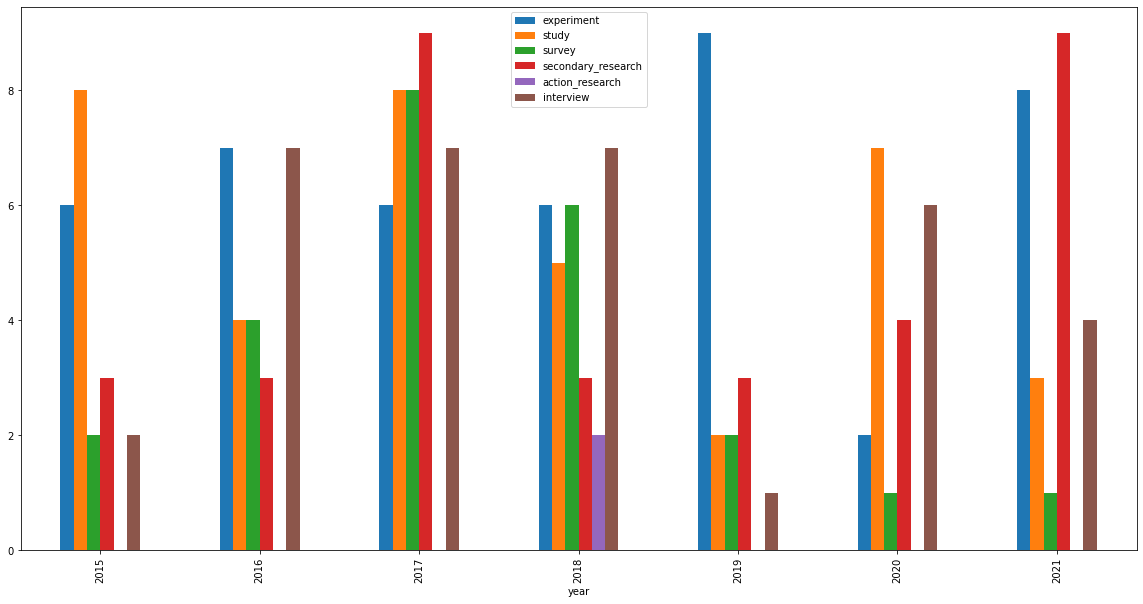

In [8]:
data.groupby(['year']).count().plot(kind='bar', figsize=(20,10))

In [9]:
query = """
        SELECT ?year, ?descriptive, ?inferential, ?grounded, ?coding, ?machine, ?error, ?reg, ?regularity, ?comparative, 
               ?category, ?sentiment, ?in_depth, ?behavioural, ?stakeholder, ?literature, ?artefact
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?paper orkgp:P29 ?year.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56048/rdfs:label ?descriptive.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043/rdfs:label ?inferential.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P57015/rdfs:label ?grounded.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59061/rdfs:label ?coding.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P57016/rdfs:label ?machine.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P15099/rdfs:label ?error}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59057/rdfs:label ?regularity.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59058/rdfs:label ?comparative.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59059/rdfs:label ?triangulation.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59060/rdfs:label ?category.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59074/rdfs:label ?sentiment.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59094/rdfs:label ?in_depth.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59095/rdfs:label ?behavioural.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59110/rdfs:label ?stakeholder.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:P59126/rdfs:label ?literature.}
                OPTIONAL{?contribution orkgp:P15124/ orkgp:60007/rdfs:label ?artefact.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
        

<AxesSubplot:xlabel='year'>

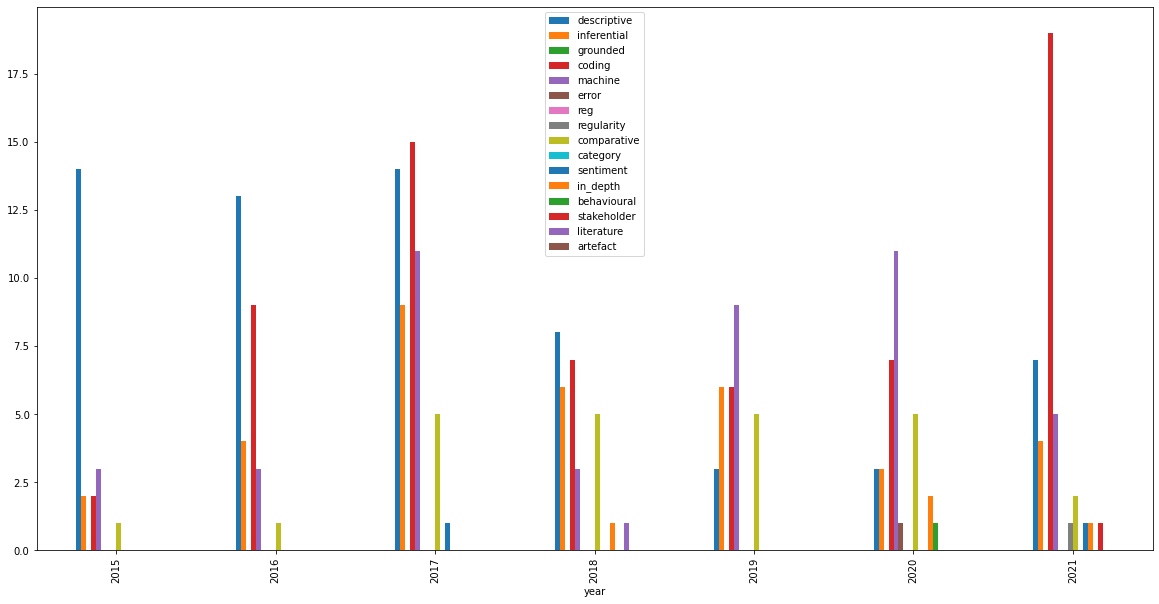

In [10]:
#adjust colors
data.groupby(['year']).count().plot(kind='bar', figsize=(20,10))

<Figure size 432x288 with 0 Axes>

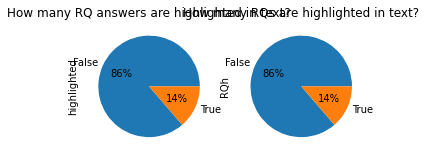

In [11]:
query = """
        SELECT ?contribution, ?RQanswer, ?highlighted, ?RQh
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                OPTIONAL{?contribution orkgp:P57004 ?RQanswer.
                OPTIONAL{?RQanswer orkgp:P55039 ?highlighted.}}
                OPTIONAL{?contribution orkgp:P37330 ?RQ.
                OPTIONAL{?RQanswer orkgp:P55039 ?RQh.}}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
fig, (ax, ax2) = plt.subplots(ncols=2)
plt.figure(0)
data['highlighted'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5), title="How many RQ answers are highlighted in text?", ax=ax)
plt.figure(1)
data['RQh'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5,5), title="How many RQs are highlighted in text?", ax=ax2)
plt.show()

Research Question Analysis

In [12]:
query = """
        SELECT ?contribution, ?rq_highlighted, ?rq_hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P37330 ?rq.
                OPTIONAL{?rq orkgp:P55039 ?rq_highlighted.}
                OPTIONAL{?rq orkgp:P55038 ?rq_hidden.}
        }
        """
rq = sparql_dataframe.get(endpoint_url, PREFIX+query)
#dataframe without research questions that are not mentioned
rq2 = rq[((rq['rq_highlighted'] == True) & (rq['rq_hidden'] == False)) | ((rq['rq_highlighted'] == False) & (rq['rq_hidden'] == True))]
query = """
        SELECT ?contribution, ?rqa_highlighted, ?rqa_hidden
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?contribution orkgp:P57004 ?rqa.
                OPTIONAL{?rqa orkgp:P55039 ?rqa_highlighted.}
                OPTIONAL{?rqa orkgp:P55038 ?rqa_hidden.}
        }
        """
rqa = sparql_dataframe.get(endpoint_url, PREFIX+query)

Research Question Answer highlighted/hidden

<Figure size 432x288 with 0 Axes>

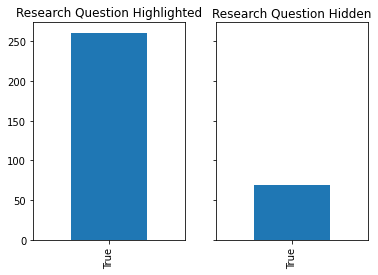

In [13]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
plt.figure(0)
rq2[rq2['rq_highlighted'] == True]['rq_highlighted'].value_counts().plot(kind='bar', title='Research Question Highlighted', ax=ax)
plt.figure(1)
rq[rq['rq_hidden'] == True]['rq_hidden'].value_counts().plot(kind='bar', title='Research Question Hidden', ax=ax2)
plt.show()

Research Question highlighted and Answer highlighted

<Figure size 432x288 with 0 Axes>

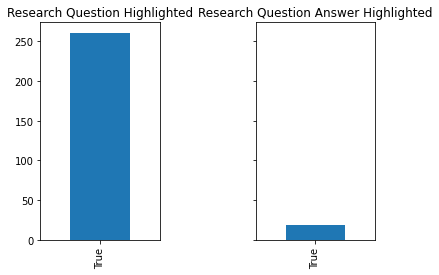

In [14]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=.8)
plt.figure(0)
rq2[rq2['rq_highlighted'] == True]['rq_highlighted'].value_counts().plot(kind='bar', title='Research Question Highlighted', ax=ax)
plt.figure(1)
rqa[rqa['rqa_highlighted'] == True]['rqa_highlighted'].value_counts().plot(kind='bar', title='Research Question Answer Highlighted', ax=ax2)
plt.show()


Research Question Highlighted and answer hidden

<Figure size 432x288 with 0 Axes>

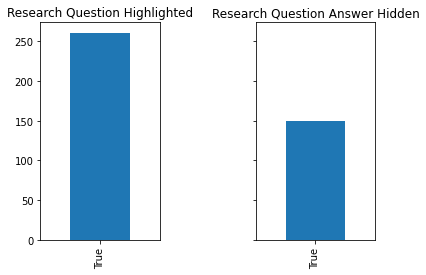

In [15]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=.8)
plt.figure(0)
rq2[rq2['rq_highlighted'] == True]['rq_highlighted'].value_counts().plot(kind='bar', title='Research Question Highlighted', ax=ax)
plt.figure(1)
rqa[rqa['rqa_hidden'] == True]['rqa_hidden'].value_counts().plot(kind='bar', title='Research Question Answer Hidden', ax=ax2)
plt.show()

Research question hidden and answer highlighted

<Figure size 432x288 with 0 Axes>

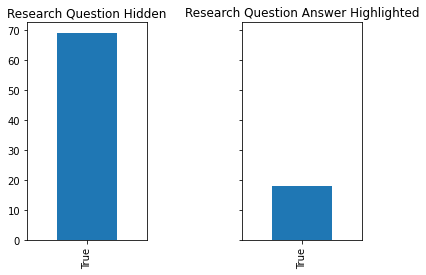

In [16]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=.8)
plt.figure(0)
rq2[rq2['rq_hidden'] == True]['rq_hidden'].value_counts().plot(kind='bar', title='Research Question Hidden', ax=ax)
plt.figure(1)
rqa[rqa['rqa_highlighted'] == True]['rqa_highlighted'].value_counts().plot(kind='bar', title='Research Question Answer Highlighted', ax=ax2)
plt.show()

Research question hidden and answer hidden

<Figure size 432x288 with 0 Axes>

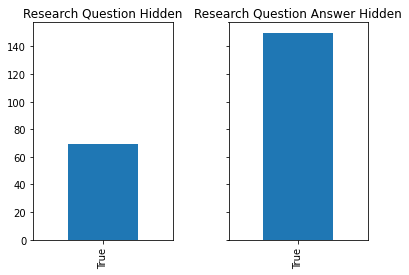

In [17]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=.4)
plt.figure(0)
rq2[rq2['rq_hidden'] == True]['rq_hidden'].value_counts().plot(kind='bar', title='Research Question Hidden', ax=ax)
plt.figure(1)
rqa[rqa['rqa_hidden'] == True]['rqa_hidden'].value_counts().plot(kind='bar', title='Research Question Answer Hidden', ax=ax2)
plt.show()

Research question not mentioned

<AxesSubplot:title={'center':'Research Question not in text'}>

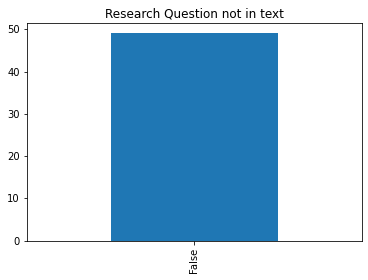

In [18]:
rq[(rq['rq_highlighted'] == False) & (rq['rq_hidden'] == False)]['rq_highlighted'].value_counts().plot(kind='bar', title="Research Question not in text")

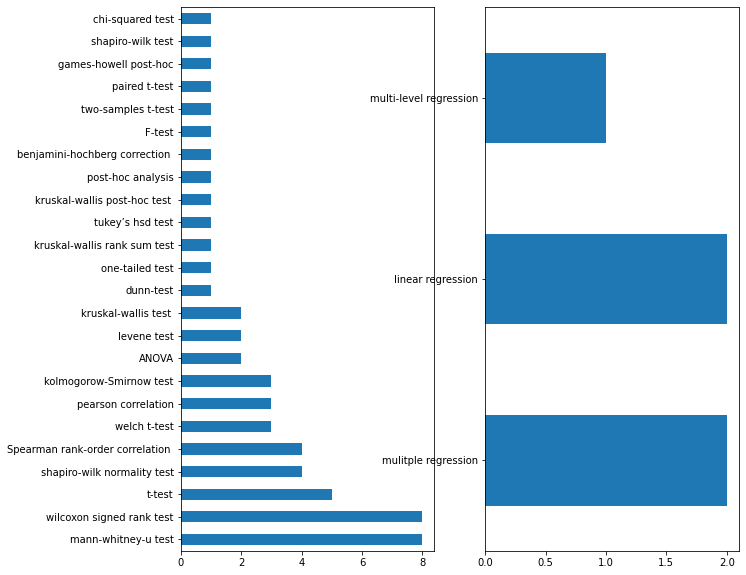

In [19]:
query = """
        SELECT ?contribution, ?hypothesis_testing, ?regression_analysis
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043/orkgp:P56044/rdfs:label ?hypothesis_testing.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P56043/orkgp:P56045/rdfs:label ?regression_analysis.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
fig, (ax, ax2) = plt.subplots(ncols=2)
data['hypothesis_testing'].value_counts().plot(kind='barh', figsize=(10,10), ax=ax)
data['regression_analysis'].value_counts().plot(kind='barh', ax=ax2)
plt.show()

<AxesSubplot:>

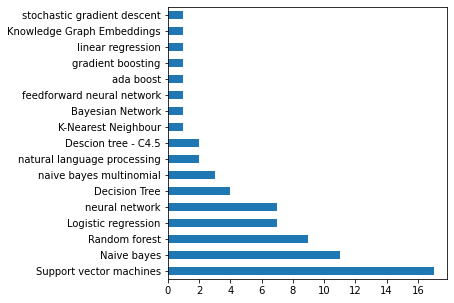

In [20]:
query = """
        SELECT ?contribution, ?machine_learning, ?evaluation, ?recall, ?precision, ?f_score, ?accuracy, ?roc_auc
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016/orkgp:P2001/rdfs:label ?machine_learning.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016/orkgp:P34/rdfs:label ?evaluation.}
                OPTIONAL{?contribution orkgp:P15124/orkgp:P57016/orkgp:P2006 ?metric.
                        OPTIONAL{?metric orkgp:P5073 ?recall.}
                        OPTIONAL{?metric orkgp:P3004 ?precision.}
                        OPTIONAL{?metric orkgp:P59137 ?f_score.}
                        OPTIONAL{?metric orkgp:P18048 ?accuracy.}
                        OPTIONAL{?metric orkgp:P59066 ?roc_auc.}}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data['machine_learning'].value_counts().plot(kind='barh', figsize=(5,5))
#data['recall'].value_counts().plot(kind='pie')

Threats to validity

In [21]:
query = """
        SELECT ?contribution, ?conclusion, ?construct, ?external, ?internal, ?reliability, ?generalizability
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?contribution orkgp:P39099 ?threats.
                OPTIONAL{?threats orkgp:P55036 ?conclusion.}
                OPTIONAL{?threats orkgp:P55037 ?construct.}
                OPTIONAL{?threats orkgp:P55034 ?external.}
                OPTIONAL{?threats orkgp:P55035 ?internal.}
                OPTIONAL{?threats orkgp:P59109 ?reliability.}
                OPTIONAL{?threats orkgp:P60006 ?generalizability.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)

<Figure size 432x288 with 0 Axes>

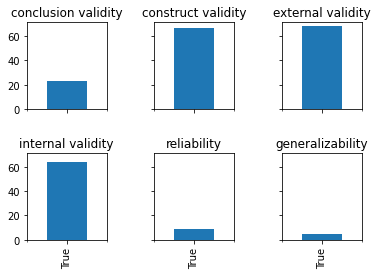

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(ncols=3, nrows=2,  sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.6, hspace=0.5)
plt.figure(0)
data[data['conclusion'] == True]['conclusion'].value_counts().plot(kind='bar', ax=ax[0,0], title='conclusion validity')
plt.figure(1)
data[data['construct'] == True]['construct'].value_counts().plot(kind='bar', ax=ax[0,1], title='construct validity')
plt.figure(2)
data[data['external'] == True]['external'].value_counts().plot(kind='bar', ax=ax[0,2], title='external validity')
plt.figure(3)
data[data['internal'] == True]['internal'].value_counts().plot(kind='bar', ax=ax[1,0], title='internal validity')
plt.figure(4)
data[data['reliability'] == True]['reliability'].value_counts().plot(kind='bar', ax=ax[1,1], title='reliability')
plt.figure(5)
data[data['generalizability'] == True]['generalizability'].value_counts().plot(kind='bar', ax=ax[1,2], title='generalizability')
plt.show()

Research Question Highlighted/Hidden in relation to research method

<AxesSubplot:>

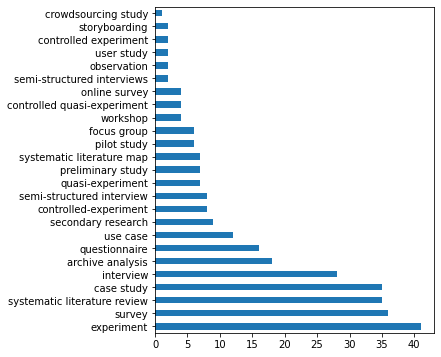

In [23]:
query = """
        SELECT ?contribution, ?year, ?data_collection, ?rq, ?rqa
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?paper orkgp:P29 ?year.
                ?contribution orkgp:P56008/rdfs:label ?data_collection.
                OPTIONAL{?contribution orkgp:P37330/orkgp:P55039 ?rq.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
collection_method_rq = data[data['data_collection'] != 'collection']
collection_method_rq[collection_method_rq['rq'] == True]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6))

Data collection method in relation with research question highlighted(2015-2021)

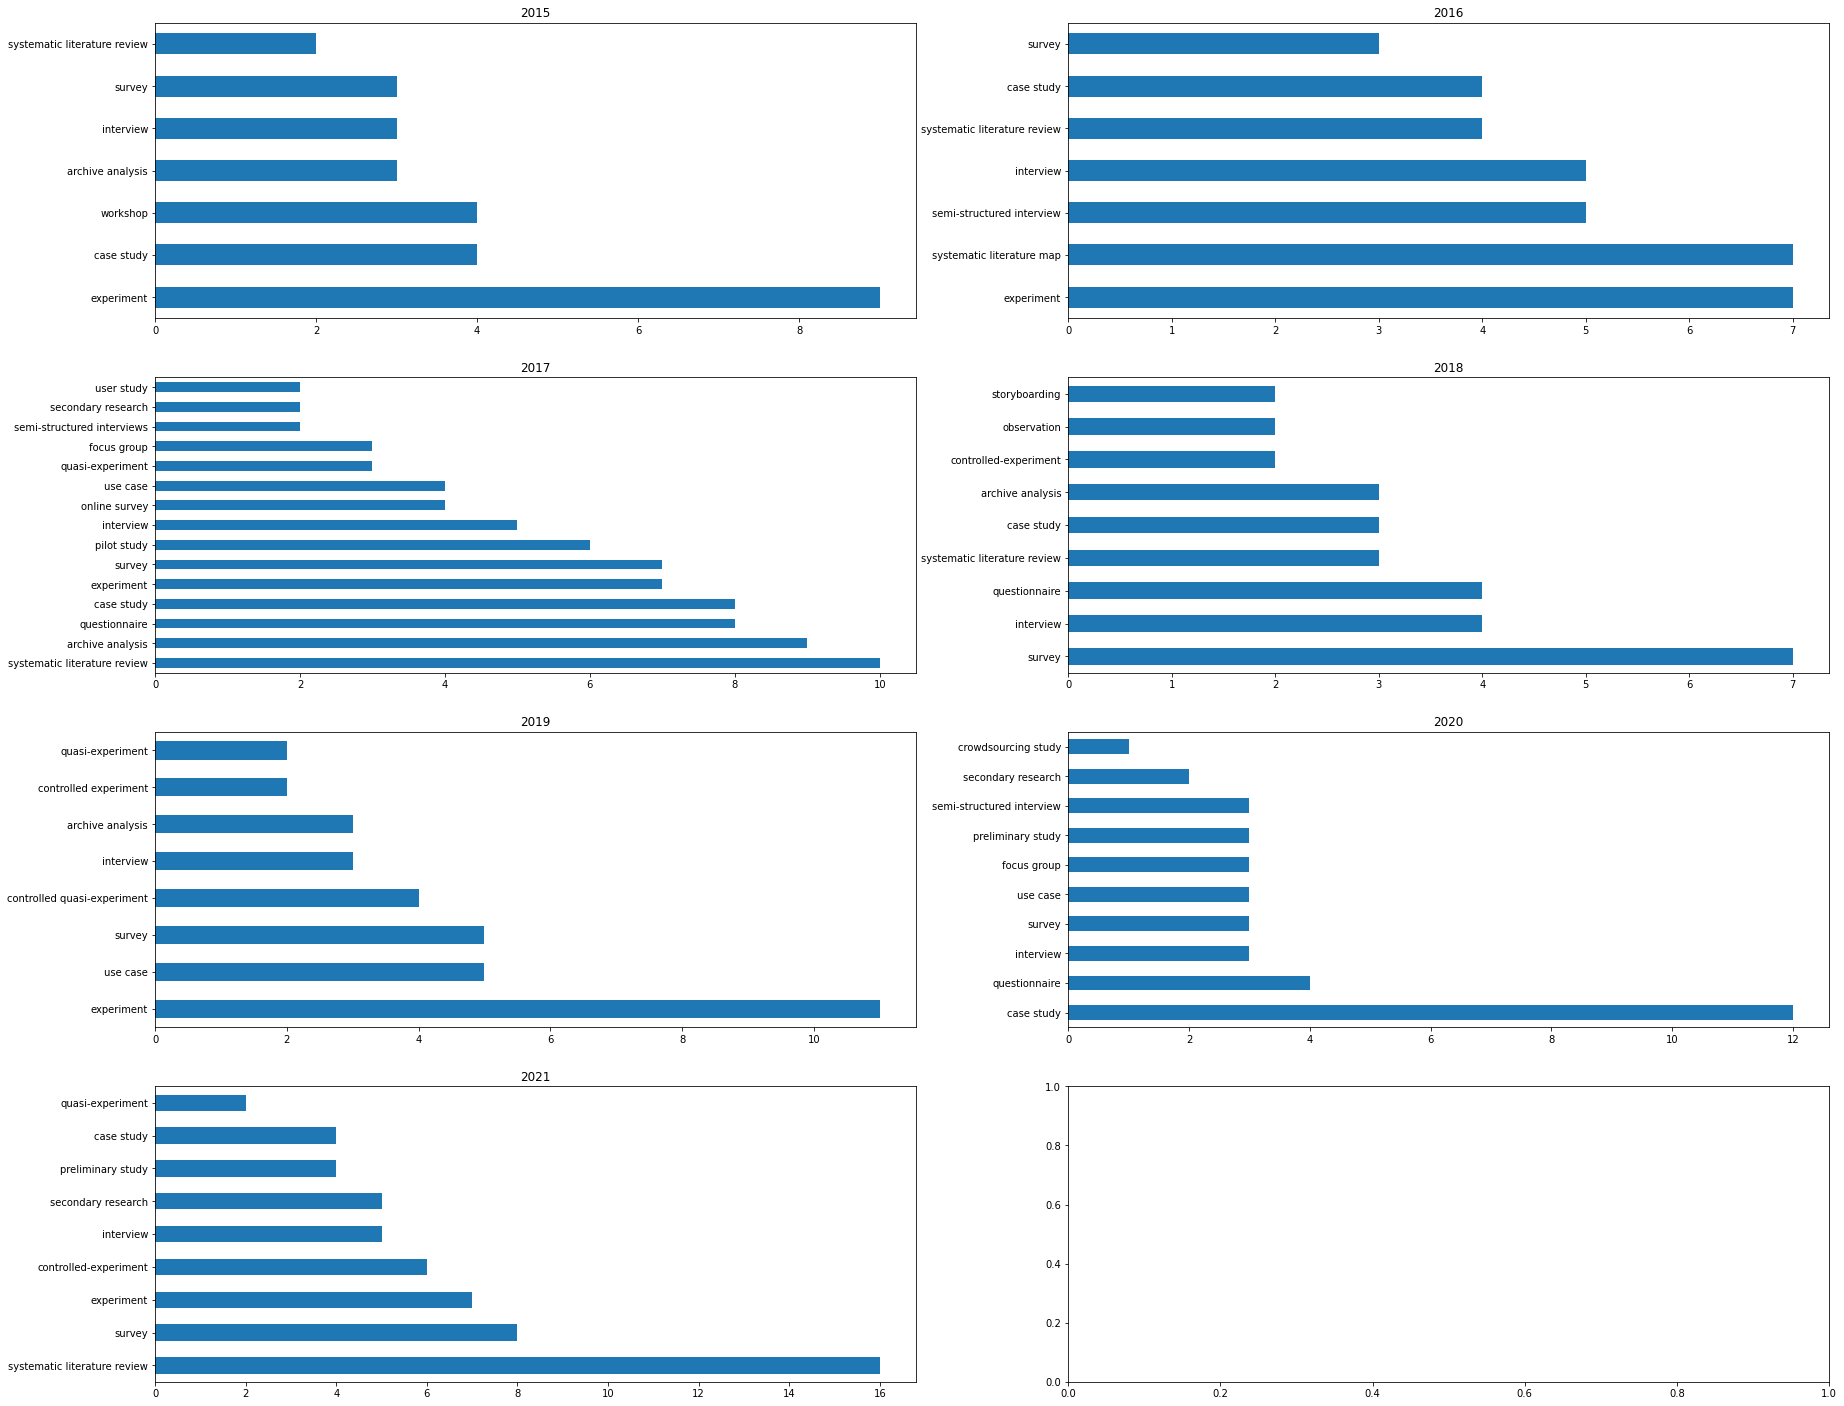

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=4)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2015)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[0,0], title=2015)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2016)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[0,1], title=2016)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2017)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[1,0], title=2017)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2018)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[1,1], title=2018)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2019)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[2,0], title=2019)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2020)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[2,1], title=2020)
plt.figure(0)
collection_method_rq[(collection_method_rq['rq'] == True) & (collection_method_rq['year'] == 2021)]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6), ax=ax[3,0], title=2021)
fig.set_figheight(25)
fig.set_figwidth(30)
plt.show()

<AxesSubplot:>

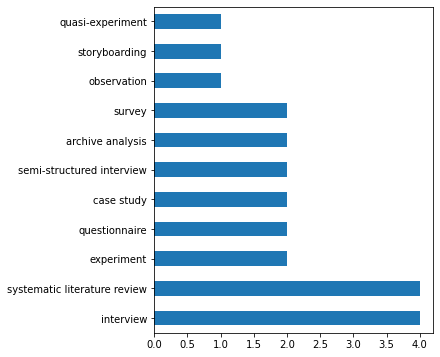

In [25]:
query = """
        SELECT ?contribution, ?year, ?data_collection, ?rqa
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?paper orkgp:P29 ?year.
                ?contribution orkgp:P56008/rdfs:label ?data_collection.
                OPTIONAL{?contribution orkgp:P57004/orkgp:P55039 ?rqa.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
collection_method_rqa = data[data['data_collection'] != 'collection']
collection_method_rqa[collection_method_rqa['rqa'] == True]['data_collection'].value_counts().plot(kind='barh', figsize=(5,6))

Data collection and Threats to validity 

In [26]:
query = """
        SELECT ?conclusion, ?construct, ?external, ?internal, ?reliability, ?generalizability, ?data_collection
        WHERE{
                ?paper orkgp:P31 ?contribution.
                ?contribution a orkgc:C27001.
                ?paper rdfs:label ?title.
                ?paper orkgp:P29 ?year.
                ?contribution orkgp:P39099 ?threats.
                OPTIONAL{?threats orkgp:P55036 ?conclusion.}
                OPTIONAL{?threats orkgp:P55037 ?construct.}
                OPTIONAL{?threats orkgp:P55034 ?external.}
                OPTIONAL{?threats orkgp:P55035 ?internal.}
                OPTIONAL{?threats orkgp:P59109 ?reliability.}
                OPTIONAL{?threats orkgp:P60006 ?generalizability.}
                OPTIONAL{?contribution orkgp:P56008/rdfs:label ?data_collection.}
        }
        """

data = sparql_dataframe.get(endpoint_url, PREFIX+query)
data

,conclusion,construct,external,internal,reliability,generalizability,data_collection
0,False,False,False,True,False,True,case study
1,False,True,True,True,True,False,experiment
2,False,False,False,False,False,True,experiment
3,False,True,False,True,False,True,case study
4,False,False,False,True,False,True,experiment
...,...,...,...,...,...,...,...
184,NaN,NaN,NaN,NaN,NaN,NaN,secondary research
185,NaN,NaN,NaN,NaN,NaN,NaN,secondary research
186,NaN,NaN,NaN,NaN,NaN,NaN,semi-structured interview
187,NaN,NaN,NaN,NaN,NaN,NaN,survey


Welche empirischen Methoden verwenden Forscher im Bereich des RE?
Wie hat sich die Verwendung dieser Methoden in den letzten Jahren geändert?

In [27]:
query = """
        SELECT ?contribution, ?year, ?experiment, ?survey, ?interview, ?study, ?secondary_research, ?action_research
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              ?paper orkgp:P29 ?year.
              ?contribution rdfs:label ?contribution_name.
              ?contribution orkgp:P56008 ?data_collection_method.
              OPTIONAL{?data_collection_method orkgp:P1007/rdfs:label ?experiment}
              OPTIONAL{?data_collection_method orkgp:P57036/rdfs:label ?survey}
              OPTIONAL{?data_collection_method orkgp:P57034/rdfs:label ?interview.}
              OPTIONAL{?data_collection_method orkgp:P57040/rdfs:label ?study.}
              OPTIONAL{?data_collection_method orkgp:P57021/rdfs:label ?secondary_research.}
              OPTIONAL{?data_collection_method orkgp:P57020/rdfs:label ?action_research.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
#get oldest year
start_year = data.sort_values(by=['year'])['year'].iloc[0]
cm = []
values = []
for i in range(2, len(data)):
        cm.append(data[data.columns[i]])
        values.append(data[data.columns[i]].value_counts().sum())
pd.DataFrame(data={'collection method': cm, 'amount':values}).plot(kind='barh', x='collection method', y='amount')
data.groupby(['year']).count().plot(kind='bar', figsize=(20,10), title='Change of method usage since {year}'.format(year=start_year))

IndexError: index 8 is out of bounds for axis 0 with size 8

Welche unterschiedlichen Methoden verwenden Forscher?

ValueError: not enough values to unpack (expected 6, got 2)

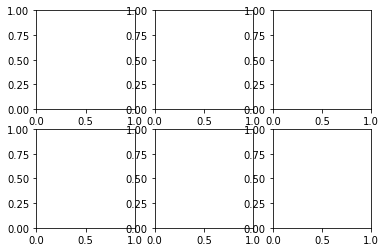

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=3, nrows=2)
for col in range(2, len(data.columns)):
    plt.figure()
    data[data.columns[col]].value_counts().plot(kind='barh', title='{col_name} methods'.format(col_name=' '.join(data.columns[col].split("_"))), ax=ax+ str(col-1))

Datenverfügbarkeit

<AxesSubplot:ylabel='Data'>

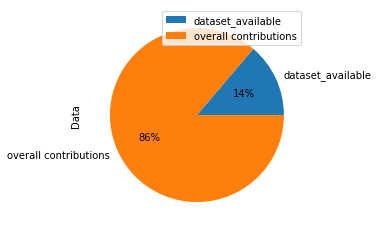

In [ ]:
query = """
        SELECT ?contribution, ?data
            WHERE {
              ?paper orkgp:P31 ?contribution.
              ?contribution a orkgc:C27001.
              ?paper rdfs:label ?title.
              OPTIONAL{?contribution orkgp:P56008/orkgp:DATA/orkgp:P17001 ?data.}
        }
        """
data = sparql_dataframe.get(endpoint_url, PREFIX+query)
available_data = data['data'].value_counts().sum()
test = pd.DataFrame({'Data':[available_data, len(data)]}, index=['dataset_available', 'overall contributions'])
test.plot(kind='pie', y='Data', autopct='%1.0f%%')                 